In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def _draw_graph(Graph):
    Dimension = 1
    FigDimension = 5
    fig,axes = plt.subplots(nrows=Dimension,ncols=Dimension,figsize=(FigDimension,FigDimension),dpi=200)
    nx.draw_circular(Graph, ax=axes, with_labels=True, edge_color='black', node_color='black', font_color='white')
    axes.set_title("Graph 0")

In [7]:
def _digraph_from_list_list(ListList):
    AdjacencyList = ""
    RowCounter = 0
    for row in ListList:
        AdjacencyList += f"{RowCounter}"
        ColumnCounter = 0
        for column in row:
            if RowCounter != ColumnCounter:
                if DataStream[RowCounter][ColumnCounter] == 1:
                    AdjacencyList += f" {ColumnCounter}"
            ColumnCounter += 1
        AdjacencyList += "\n"
        RowCounter += 1
    return nx.parse_adjlist(AdjacencyList.splitlines(), nodetype=int, create_using=nx.DiGraph())

In [10]:
def _reverse_transivitiy_reduce(Graph):
    DiGraph = nx.DiGraph(Graph)
    for TargetNode in DiGraph.nodes():
        for SourceNode in DiGraph.nodes():
            if SourceNode == TargetNode:
                continue
            if not DiGraph.has_edge(SourceNode, TargetNode):
                if nx.has_path(DiGraph, SourceNode, TargetNode):
                    DiGraph.add_edge(SourceNode, TargetNode)
    return DiGraph

In [11]:
def _listlist_from_digraph(DiGraph):
    listlist = []
    for Row in DiGraph.nodes():
        OutputRow = []
        for Column in DiGraph.nodes():
            if Column < Row:
                OutputRow.append(0)
            elif Column == Row:
                OutputRow.append(1)
            else:
                if nx.has_path(DiGraph, Row, Column):
                    OutputRow.append(1)
                else:
                    OutputRow.append(0)
        listlist.append(OutputRow)
    return listlist

[1, 1, 0, 1, 0]
[0, 1, 1, 1, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 1]
[0, 0, 0, 0, 1]
---------------
[1, 1, 1, 1, 1]
[0, 1, 1, 1, 1]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 1]


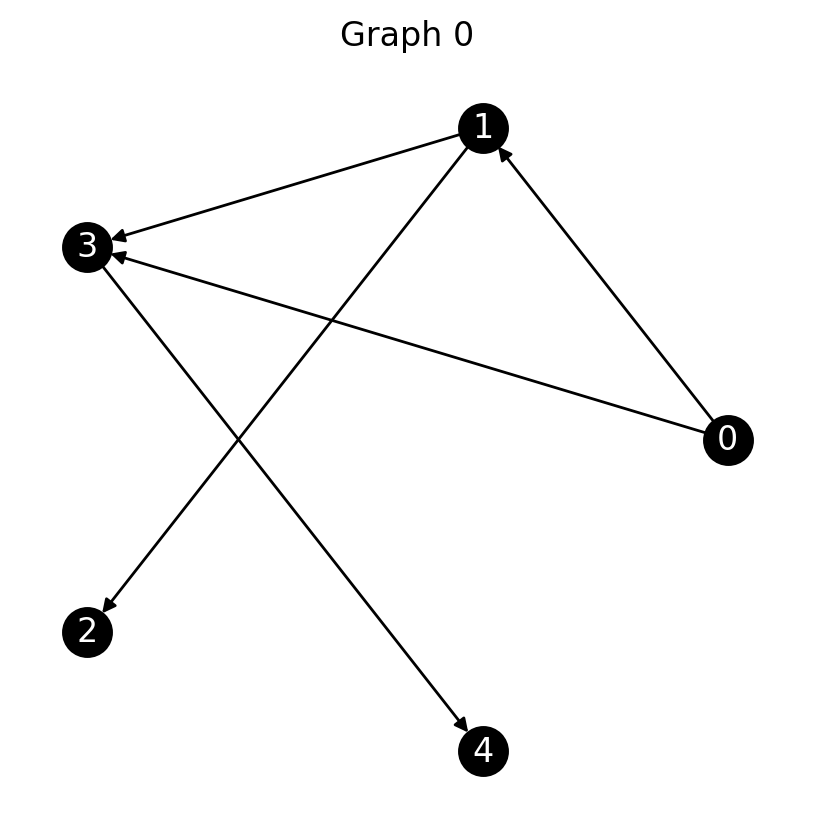

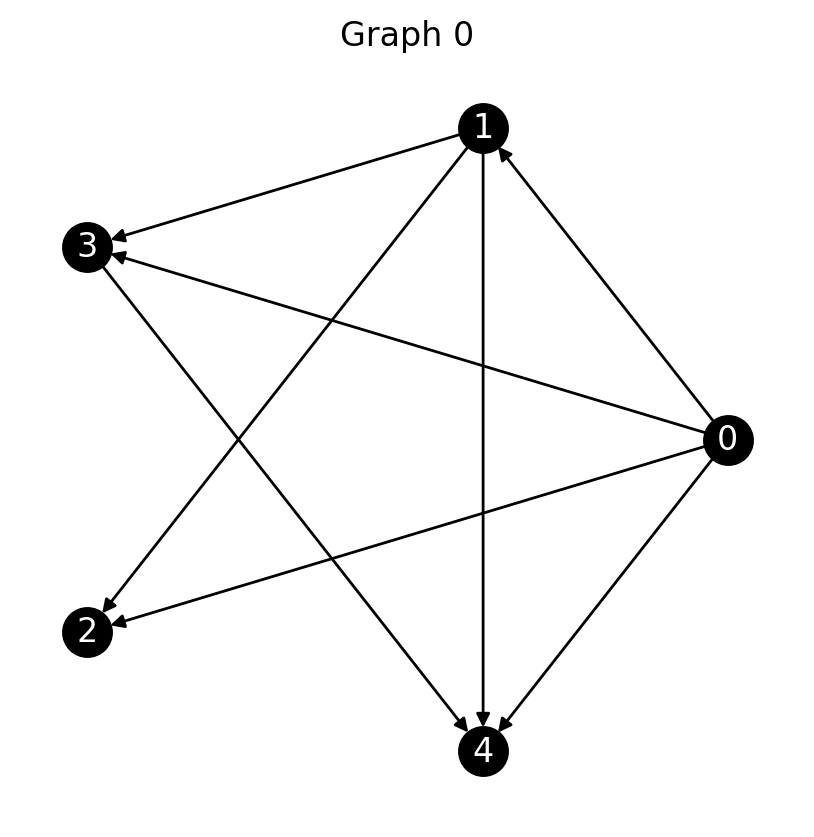

In [14]:
DataStream = [
    [1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1]
]
for Row in DataStream:
    print(Row)

DiGraph = _digraph_from_list_list(DataStream)
_draw_graph(DiGraph)

DiGraph = _reverse_transivitiy_reduce(DiGraph)
_draw_graph(DiGraph)

OutputStream = _listlist_from_digraph(DiGraph)

print("---------------")
for Row in OutputStream:
    print(Row)